# 테스트 데이터 생성

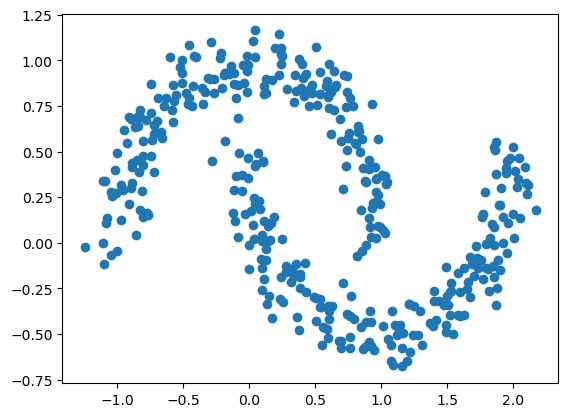

In [1]:
#Step 1. 테스트용 데이터를 생성합니다.
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=400 , noise = 0.1 , random_state=10)
plt.scatter(X[ :, 0] , X[ : , 1])
plt.show()

# 테스트 코드

In [2]:
#Step 2. Clustering 진행 정도를 보여줄 시각화함수를 생성합니다.
def cluster_result(X , y , title) :
  plt.scatter( X[y==0,0] , X[y==0,1] , c='green' , marker='o' , s=40 ,
              label="Cluster_1")
  plt.scatter( X[y==1,0] , X[y==1,1] , c='red' , marker='s' , s=40 ,
              label="Cluster_2")
  plt.title(title)
  plt.legend()
  plt.show()

c:\Users\qq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


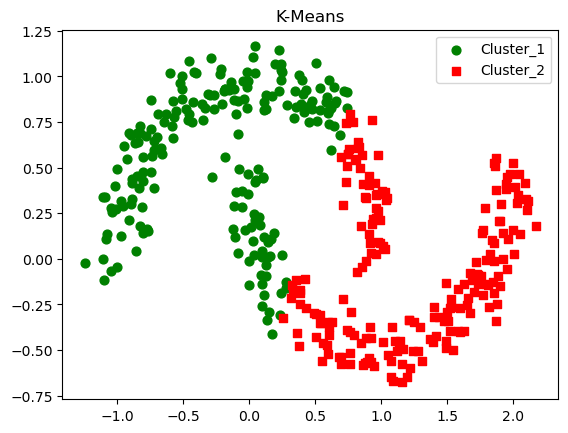

In [4]:
#Step 3. KMeans 클러스터링을 진행합니다.
# Kmeans 라이브러리 import
from sklearn.cluster import KMeans

# 모델 생성(n_clusters=2 , random_state=10)
km = KMeans(n_clusters=2, random_state=10)

# 모델 학습
result = km.fit_predict(X)

# 시각화 함수 출력
cluster_result(X, result, title='K-Means')

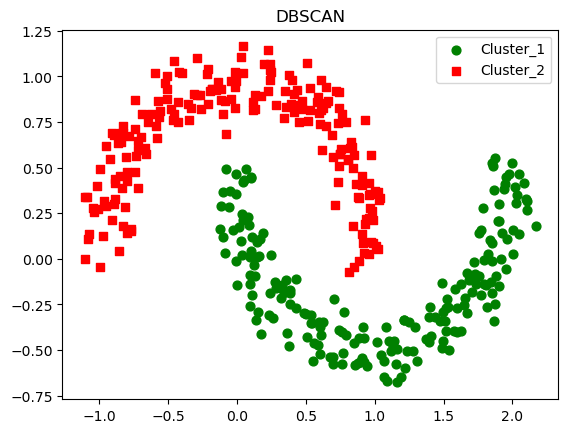

In [8]:
#Step 3. DBSCAN 클러스터링을 진행합니다.
from sklearn.cluster import DBSCAN

# Kmeans 라이브러리 import

# 모델 생성(eps=0.2 , min_samples=15 , metric='euclidean')
db = DBSCAN(eps=0.2, min_samples=15)

# 모델 학습
y_db = db.fit_predict(X)

# 시각화 함수 출력
cluster_result(X, y_db, title='DBSCAN')

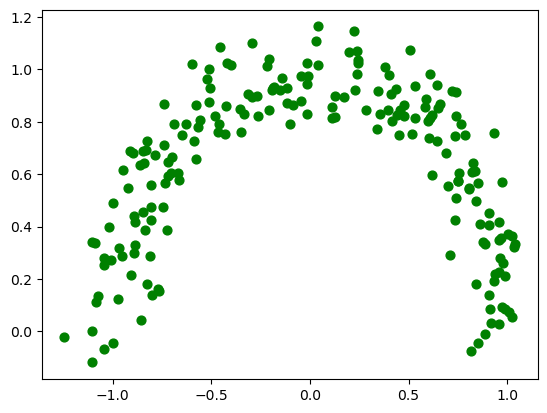

In [9]:
plt.scatter( X[y==0,0] , X[y==0,1] , c='green' , marker='o' , s=40 ,
            label="Cluster_1")

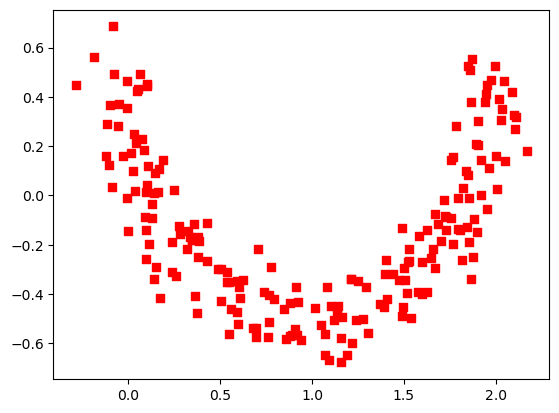

In [10]:
plt.scatter( X[y==1,0] , X[y==1,1] , c='red' , marker='s' , s=40 ,
            label="Cluster_2")

# 실습 코드

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def vis_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['trans1'], y=label_cluster['trans2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
# 실험을 위한 데이터 생성
from sklearn.datasets import make_circles
import pandas as pd

# 2개의 원 그리는 코드
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['trans1', 'trans2'])
clusterDF['target'] = y

# 그린 원 시각화
vis_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [ ]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

# Kmeans 군집분석 객체 생성 k=2
kmeans = None

# X에 대해 학습
kmeans_labels = None

# 학습 결과 저장
clusterDF['kmeans_cluster'] = kmeans_labels

# 시각화
vis_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

In [ ]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

# DBSCAN 군집분석 객체 생성()
dbscan = None

# X에 대해 학습
dbscan_labels = None

# 학습 결과 저장
clusterDF['dbscan_cluster'] = dbscan_labels

# 시각화
vis_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)